# PredictAD - Predicting Alzheimer's disease from the MCI stage using the Alzheimer's disease NeuroImaging Initiative (ADNI) datasets


# ADNIMERGE data exploration  
This notebook is to serve as to get familiar with the largest ADNI dataset, the ADNIMERGE file;  
provide some summary statistics, get insights into the disease populations, distributions, exploratory data analysis and correlations (still to be added).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy as sp
from scipy import stats

from collections import Counter 

%matplotlib inline

## Loading the ADNIMERGE.csv dataset  
The ADNIMERGE dataset can be found in the folder DATA_15_12_2017/Study_info. The data in this folder are limited to study info, clinical, sociodemographic and neuropsychological data. Imaging and genetics data are still at our availability, but not yet downloaded. The ADNIMERGE dataset is basically one large dataset containing the most important features of the ADNI study, and most/all can also be found in the separate datasets in the DATA folder. In case you would like to know what all the abbreviations are, you can find all study codes in the so-called 'dictionary files, and the file ADNIMERGE_DICT in the Study_info folder contains specifically the codes for the ADNIMERGE data (see below also).
More info on the ADNI study in general (centers included, cohorts-ADNI1, ADNIGO, ADNI2, ADNI3, study design etc.) can be found on the website: http://adni.loni.usc.edu/  

The research proposal for this project can be found here: https://docs.google.com/document/d/10HG28wYtzU3_L3ifDmmoMLienXMgRIJt08A60B9YonY/edit?usp=sharing 

In [7]:
adnimerge = pd.read_csv("ADNI_data/DATA_15_12_2017/Study_Info/ADNIMERGE.csv")
adnimerge.head(10)

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.000000,0.00000,0,0,2017-12-08 23:40:58.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,0.000000,0.00000,0,0,2017-12-08 23:40:58.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,0.498289,5.96721,6,6,2017-12-08 23:40:58.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,0.999316,11.96720,12,12,2017-12-08 23:40:58.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,1.998630,23.93440,24,24,2017-12-08 23:40:58.0
5,4,022_S_0004,bl,22,ADNI1,ADNI1,2005-11-08,LMCI,67.5,Male,...,153.1,13.29,NaN,NaN,NaN,0.000000,0.00000,0,0,2017-12-08 23:40:58.0
6,4,022_S_0004,m06,22,ADNI1,ADNI1,2006-05-02,LMCI,67.5,Male,...,153.1,13.29,NaN,NaN,NaN,0.479124,5.73770,6,6,2017-12-08 23:40:58.0
7,4,022_S_0004,m12,22,ADNI1,ADNI1,2006-11-14,LMCI,67.5,Male,...,153.1,13.29,NaN,NaN,NaN,1.015740,12.16390,12,12,2017-12-08 23:40:58.0
8,4,022_S_0004,m18,22,ADNI1,ADNI1,2007-05-14,LMCI,67.5,Male,...,153.1,13.29,NaN,NaN,NaN,1.511290,18.09840,18,18,2017-12-08 23:40:58.0
9,4,022_S_0004,m36,22,ADNI1,ADNI1,2008-11-18,LMCI,67.5,Male,...,153.1,13.29,NaN,NaN,NaN,3.028060,36.26230,36,36,2017-12-08 23:40:58.0


### Subject Selection for ADNI
The subjects for the study were classified as
normal controls, subjects with MCI, or subjects with mild AD.
The criteria for classification of the subjects were as follows.
With respect to memory complaints, the normal subjects had
none, while the subjects with MCI and subjects with AD both
had to have complaints. On the Mini-Mental State Examination
(MMSE), the range for the normal subjects and subjects with
MCI was 24 –30, and for AD 20 –26; all are inclusive. The CDR
score for normal subjects was 0 and for subjects with MCI was
0.5 with a mandatory requirement of the memory box score
being 0.5 or greater, and the rating for subjects with AD was 0.5
or 1. For the memory criterion, delayed recall of 1 paragraph
from the Logical Memory II subscale of the Wechsler Memory
Scale–Revised (maximum score of 25)12 was used with cutoff
scores as follows based on education: normal subjects 9 for 16
years of education, 5 for 8 –15 years of education, and 3 for
0 –7 years of education. For subjects with MCI and subjects with
AD, these scores were 8 for 16 years of education, 4 for
8 –15 years of education, and 2 for 0 –7 years of education.
In addition, the normal control subjects were to be matched to
the other subjects in age and could not have any significant impairment
in cognitive functions or activities of daily living. The subjects
with MCI had to be largely intact with regard to general cognition
and functional performance, and could not qualify for the diagnosis
of dementia. The subjects with AD had mild AD and had to meet
the National Institute of Neurological and Communicative Disorders
and Stroke–Alzheimer’s Disease and Related Disorders Association
criteria for probable AD.

### Loading the data_dictionary for ADNIMERGE

In [8]:
ADNIMERGE_dictionary = pd.read_csv("ADNI_data/DATA_15_12_2017/Study_Info/ADNIMERGE_DICT.csv")
ADNIMERGE_dictionary[['FLDNAME', 'TBLNAME', 'CRFNAME', 'TEXT']].head(10)

,FLDNAME,TBLNAME,CRFNAME,TEXT
0,RID,ADNIMERGE,Key variables merged into one data table,Participant roster ID
1,PTID,ADNIMERGE,Key variables merged into one data table,Original study protocol
2,ABETA,ADNIMERGE,Key variables merged into one data table,CSF ABETA
3,VISCODE,ADNIMERGE,Key variables merged into one data table,Visit code
4,SITE,ADNIMERGE,Key variables merged into one data table,Site
5,COLPROT,ADNIMERGE,Key variables merged into one data table,Study protocol of data collection
6,ORIGPROT,ADNIMERGE,Key variables merged into one data table,Original study protocol
7,EXAMDATE,ADNIMERGE,Key variables merged into one data table,Date
8,DX_bl,ADNIMERGE,Key variables merged into one data table,Baseline Dx
9,AGE,ADNIMERGE,Key variables merged into one data table,Age


### Creating a separate dataset from ADNIMERGE including only info on baseline, 6 months, 12 months, 24 months and 36 months

In [9]:
adnimerge_baseline_3years = adnimerge[adnimerge['VISCODE'].isin(['bl','m06', 'm12', 'm24','m36'])]
adnimerge_baseline_3years.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.000000,0.00000,0,0,2017-12-08 23:40:58.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,0.000000,0.00000,0,0,2017-12-08 23:40:58.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,0.498289,5.96721,6,6,2017-12-08 23:40:58.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,0.999316,11.96720,12,12,2017-12-08 23:40:58.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,1.998630,23.93440,24,24,2017-12-08 23:40:58.0


### Creating a separate dataset from ADNIMERGE including only info on baseline
To have only information for unique individuals, as multiple lines of follow ups (multiple VSICODES) belong to one patient

In [10]:
adnimerge_baseline = adnimerge[adnimerge['VISCODE'] == 'bl']
adnimerge_baseline.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.0,0.0,0,0,2017-12-08 23:40:58.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,0.0,0.0,0,0,2017-12-08 23:40:58.0
5,4,022_S_0004,bl,22,ADNI1,ADNI1,2005-11-08,LMCI,67.5,Male,...,153.1,13.29,NaN,NaN,NaN,0.0,0.0,0,0,2017-12-08 23:40:58.0
10,5,011_S_0005,bl,11,ADNI1,ADNI1,2005-09-07,CN,73.7,Male,...,337.0,33.43,1.29799,NaN,NaN,0.0,0.0,0,0,2017-12-08 23:40:58.0
15,6,100_S_0006,bl,100,ADNI1,ADNI1,2005-11-29,LMCI,80.4,Female,...,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,2017-12-08 23:40:58.0


In [11]:
pd.DataFrame(adnimerge_baseline['DX_bl'].value_counts())

,DX_bl
LMCI,533
CN,341
AD,329
EMCI,257
SMC,81


## General info & Summary Statistics

In [12]:
adnimerge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11488 entries, 0 to 11487
Columns: 109 entries, RID to update_stamp
dtypes: float64(86), int64(6), object(17)
memory usage: 9.6+ MB


Disease categories at baseline used

In [8]:
adnimerge['DX_bl'].unique()

array(['CN', 'AD', 'LMCI', 'SMC', 'EMCI', nan], dtype=object)

All column values / features used - for abbreviations see DICTionary files

In [9]:
adnimerge.columns.values

array(['RID', 'PTID', 'VISCODE', 'SITE', 'COLPROT', 'ORIGPROT',
       'EXAMDATE', 'DX_bl', 'AGE', 'PTGENDER', 'PTEDUCAT', 'PTETHCAT',
       'PTRACCAT', 'PTMARRY', 'APOE4', 'FDG', 'PIB', 'AV45', 'ABETA',
       'TAU', 'PTAU', 'CDRSB', 'ADAS11', 'ADAS13', 'ADASQ4', 'MMSE',
       'RAVLT_immediate', 'RAVLT_learning', 'RAVLT_forgetting',
       'RAVLT_perc_forgetting', 'LDELTOTAL', 'DIGITSCOR', 'TRABSCOR',
       'FAQ', 'MOCA', 'EcogPtMem', 'EcogPtLang', 'EcogPtVisspat',
       'EcogPtPlan', 'EcogPtOrgan', 'EcogPtDivatt', 'EcogPtTotal',
       'EcogSPMem', 'EcogSPLang', 'EcogSPVisspat', 'EcogSPPlan',
       'EcogSPOrgan', 'EcogSPDivatt', 'EcogSPTotal', 'FLDSTRENG',
       'FSVERSION', 'Ventricles', 'Hippocampus', 'WholeBrain',
       'Entorhinal', 'Fusiform', 'MidTemp', 'ICV', 'DX', 'mPACCdigit',
       'mPACCtrailsB', 'EXAMDATE_bl', 'CDRSB_bl', 'ADAS11_bl',
       'ADAS13_bl', 'ADASQ4_bl', 'MMSE_bl', 'RAVLT_immediate_bl',
       'RAVLT_learning_bl', 'RAVLT_forgetting_bl',
       'RAVLT_

Summary Statistics

In [10]:
adnimerge.describe() # summary statistics for numerical variables

,RID,SITE,AGE,PTEDUCAT,APOE4,FDG,PIB,AV45,ABETA,TAU,...,ABETA_bl,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M
count,11488.000000,11488.000000,11488.000000,11488.000000,11416.000000,2977.000000,211.000000,1759.000000,1953.000000,1954.000000,...,7355.00000,7355.000000,7355.000000,8050.000000,148.000000,4860.000000,11488.000000,11488.000000,11488.000000,11488.000000
mean,2190.613162,73.726758,73.990904,15.996344,0.587246,1.195058,1.808294,1.235786,815.938710,297.059197,...,868.77743,281.834397,27.457534,1.235431,1.589713,1.241582,2.276905,27.266864,27.183583,26.989815
std,1872.446124,109.696868,6.939489,2.821183,0.669275,0.161594,0.419325,0.231737,358.677395,137.258671,...,369.29427,129.965956,14.446639,0.146741,0.305744,0.224429,2.305529,27.609655,27.571148,27.365763
min,2.000000,2.000000,54.400000,4.000000,0.000000,0.636804,1.095000,0.814555,203.000000,88.690000,...,203.00000,88.690000,8.210000,0.697264,1.155000,0.838537,0.000000,0.000000,0.000000,0.000000
25%,572.000000,21.000000,70.000000,14.000000,0.000000,1.097510,1.395000,1.031510,540.200000,195.325000,...,576.40000,185.700000,16.480000,1.146280,1.360000,1.043500,0.498289,5.967210,6.000000,6.000000
50%,1243.000000,41.000000,74.000000,16.000000,0.000000,1.205180,1.882500,1.205920,730.900000,266.850000,...,781.00000,250.200000,23.980000,1.242320,1.490000,1.214780,1.524980,18.262300,18.000000,18.000000
75%,4320.000000,116.000000,78.925000,18.000000,1.000000,1.303010,2.132500,1.409845,1038.000000,369.650000,...,1124.00000,349.200000,34.830000,1.331405,1.835000,1.414190,3.146475,37.680300,36.000000,36.000000
max,6117.000000,941.000000,91.400000,20.000000,2.000000,1.707170,2.927500,2.669210,1697.000000,915.800000,...,1697.00000,851.800000,103.000000,1.707170,2.282500,2.025560,12.109500,145.016000,144.000000,144.000000


In [11]:
adnimerge.describe(include=['O']) # summary statistics for categorical variables

,PTID,VISCODE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,PTGENDER,PTETHCAT,PTRACCAT,PTMARRY,FLDSTRENG,FSVERSION,DX,EXAMDATE_bl,FLDSTRENG_bl,FSVERSION_bl,update_stamp
count,11488,11488,11488,11488,11488,11430,11488,11488,11488,11488,6241,6981,7873,11488,10158,11346,11488
unique,1599,25,4,4,2785,5,2,3,7,5,2,2,3,862,2,2,24
top,127_S_0112,bl,ADNI2,ADNI1,2012-02-15,LMCI,Male,Not Hisp/Latino,White,Married,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,MCI,2006-04-25,1.5 Tesla MRI,Cross-Sectional FreeSurfer (FreeSurfer Version...,2017-12-08 23:41:02.0
freq,20,1599,5821,6523,17,4422,6604,11097,10701,8876,3676,3695,3574,86,6501,6514,917


## Creating an overview of patient groups and disease categories

In [12]:
adnimerge.head()

,RID,PTID,VISCODE,SITE,COLPROT,ORIGPROT,EXAMDATE,DX_bl,AGE,PTGENDER,...,TAU_bl,PTAU_bl,FDG_bl,PIB_bl,AV45_bl,Years_bl,Month_bl,Month,M,update_stamp
0,2,011_S_0002,bl,11,ADNI1,ADNI1,2005-09-08,CN,74.3,Male,...,NaN,NaN,1.36926,NaN,NaN,0.000000,0.00000,0,0,2017-12-08 23:40:58.0
1,3,011_S_0003,bl,11,ADNI1,ADNI1,2005-09-12,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,0.000000,0.00000,0,0,2017-12-08 23:40:58.0
2,3,011_S_0003,m06,11,ADNI1,ADNI1,2006-03-13,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,0.498289,5.96721,6,6,2017-12-08 23:40:58.0
3,3,011_S_0003,m12,11,ADNI1,ADNI1,2006-09-12,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,0.999316,11.96720,12,12,2017-12-08 23:40:58.0
4,3,011_S_0003,m24,11,ADNI1,ADNI1,2007-09-12,AD,81.3,Male,...,239.7,22.83,1.09079,NaN,NaN,1.998630,23.93440,24,24,2017-12-08 23:40:58.0


In [13]:
# Overview of patients per diagnosis categorie at for diagnosis at baseline
overview_patients_DX_bl = adnimerge_baseline.groupby(['DX_bl']).count()['RID']
overview_patients_DX_bl = pd.DataFrame(overview_patients_DX_bl)
overview_patients_DX_bl

,RID
DX_bl,
AD,329
CN,341
EMCI,257
LMCI,533
SMC,81


In [14]:
# Overview of patients per diagnosis categorie
#overview_patients = adnimerge_baseline['DX'].value_counts()
overview_patients_DX = adnimerge_baseline.groupby(['DX']).count()['RID']
overview_patients_DX = pd.DataFrame(overview_patients_DX)
overview_patients_DX

,RID
DX,
CN,453
Dementia,335
MCI,791


In [15]:
# Overview of patient records per VISCODE and diagnosis at baseline
overview_DX_bl = adnimerge_baseline_3years.groupby(['VISCODE', 'DX_bl']).count()['RID']
overview_DX_bl = pd.DataFrame(overview_DX_bl)
overview_DX_bl.columns = ['Number of Participants']
overview_DX_bl.unstack(level=1)

Number of Participants                   
DX_bl                       AD   CN EMCI LMCI SMC
VISCODE                                          
bl                         329  341  257  533  81
m06                        298  327  227  510  70
m12                        266  312  233  481  22
m24                        177  289  198  410  64
m36                         26  191  180  345  10

In [16]:
# Overview of patient_records per VISCODE and diagnosis categorie
overview_DX = adnimerge_baseline_3years.groupby(['VISCODE', 'DX']).count()['RID']
overview_DX = pd.DataFrame(overview_DX)
overview_DX.columns = ['Number of Participants']
overview_DX.unstack(level=1)

Number of Participants              
DX                          CN Dementia  MCI
VISCODE                                     
bl                         453      335  791
m06                        397      345  689
m12                        337      364  606
m24                        344      344  418
m36                        193      193  329

In [17]:
#miscellanious

#MCI_bl_AD_m36 = adnimerge[(adnimerge['DX_bl'].isin(['EMCI', "LMCI"])) & (adnimerge['DX'] == 'Dementia') & (adnimerge['VISCODE'] == 'm36')]
#MCI_bl_AD_m36.head()


#Method1
#MCI_bl = adnimerge[adnimerge['DX_bl'].isin(['EMCI', "LMCI"])
#DX_Dementia = MCI_bl[MCI_bl['DX'] == 'Dementia']
#Converted_m36 = DX_Dementia[DX_Dementia['VISCODE'] == 'm36']
#Converted_m36

#Method2
#np.unique(np.array(new['RID'].loc[new['DX'] == 'Dementia']))

#Method3
#new = adnimerge[adnimerge['DX_bl'] == 'CN']
#new2 = new.loc[new['VISCODE'] == 'm36', ['RID', 'DX_bl', 'DX']]
#new2

## Data Visualizations
### Simple distributions for important AD-related variables


In [13]:
# plt.style.use('seaborn-white')

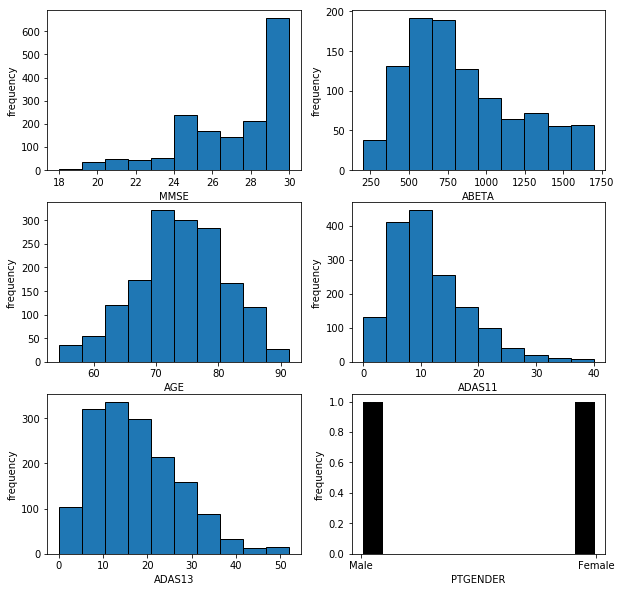

In [14]:
#Method 1

feature_list = ['MMSE', 'ABETA', 'AGE', 'ADAS11', 'ADAS13', 'PTGENDER']
liste = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
#i = [0, 0 , 1, 1, 2, 2]
#j = [0, 1, 0, 1, 0, 1]


fig, ax = plt.subplots(3, 2, figsize=(10, 10))

for item, coords in zip(feature_list, liste) :
    variable = str(item)

#    fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharex='col', sharey='row')
    
    #for i in range(3):
        #for j in range(2):
    ax[coords].hist(adnimerge_baseline[variable].dropna(), ec='black')
    ax[coords].set_xlabel(variable)
    ax[coords].set_ylabel('frequency')

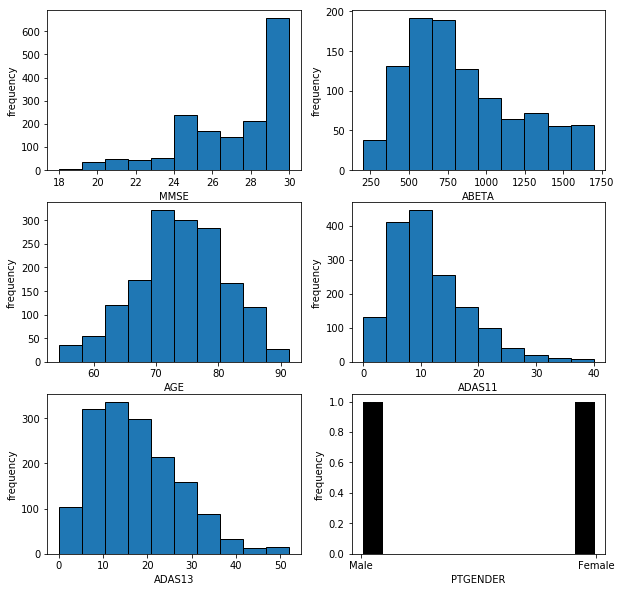

In [15]:
#Method 1

feature_list = ['MMSE', 'ABETA', 'AGE', 'ADAS11', 'ADAS13', 'PTGENDER']
liste = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
#i = [0, 0 , 1, 1, 2, 2]
#j = [0, 1, 0, 1, 0, 1]


fig, ax = plt.subplots(3, 2, figsize=(10, 10))

for item, coords in zip(feature_list, liste) :
    variable = str(item)

#    fig, ax = plt.subplots(3, 2, figsize=(10, 10), sharex='col', sharey='row')
    
    #for i in range(3):
        #for j in range(2):
    ax[coords].hist(adnimerge_baseline[variable].dropna(), ec='black')
    ax[coords].set_xlabel(variable)
    ax[coords].set_ylabel('frequency')

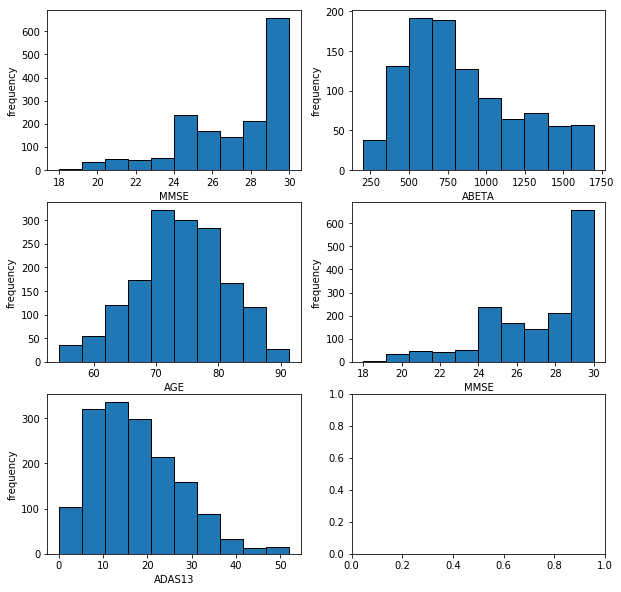

In [16]:
#Method 2

feature_list = ['MMSE', 'ABETA', 'AGE', 'MMSE', 'ADAS13']
liste = [(0,0),(0,1),(1,0),(1,1),(2,0),(2,1)]
#i = [0, 0 , 1, 1, 2, 2]
#j = [0, 1, 0, 1, 0, 1]


fig, ax = plt.subplots(3, 2, figsize=(10, 10))

for index, item in enumerate(feature_list) :
    variable = str(item)
 
    #for i in range(3):
        #for j in range(2):
        
    ax[liste[index]].hist(adnimerge_baseline[variable].dropna(), ec='black')
    ax[liste[index]].set_xlabel(variable)
    ax[liste[index]].set_ylabel('frequency')

Text(0,0.5,'frequency')

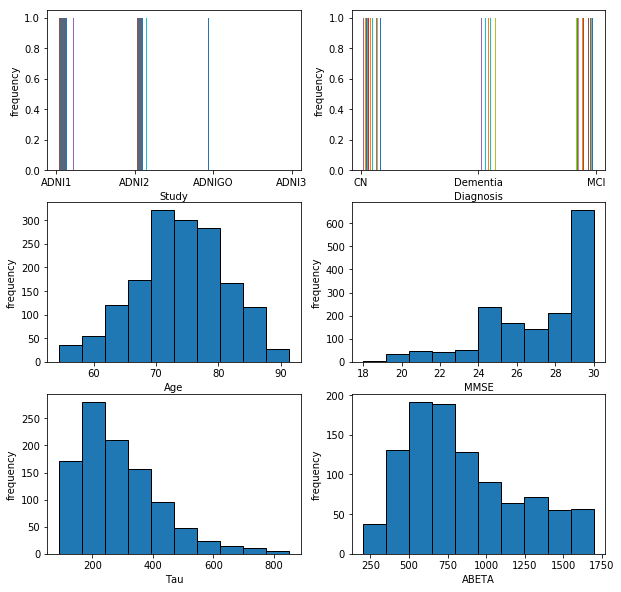

In [17]:
#Manually created graphs

fig, axs = plt.subplots(3, 2, figsize=(10, 10))


axs[0, 0].hist(adnimerge_baseline['COLPROT'])
axs[0, 0].set_xlabel('Study')
axs[0, 0].set_ylabel('frequency')

axs[0, 1].hist(adnimerge_baseline['DX'].dropna())
axs[0, 1].set_xlabel('Diagnosis')
axs[0, 1].set_ylabel('frequency')

axs[1, 0].hist(adnimerge_baseline['AGE'], ec='black')
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('frequency')

axs[2, 1].hist(adnimerge_baseline['ABETA'].dropna(), ec='black')
axs[2, 1].set_xlabel('ABETA')
axs[2, 1].set_ylabel('frequency')

axs[2, 0].hist(adnimerge_baseline['TAU'].dropna(), ec='black')
axs[2, 0].set_xlabel('Tau')
axs[2, 0].set_ylabel('frequency')

axs[1, 1].hist(adnimerge_baseline['MMSE'].dropna(), ec='black')
axs[1, 1].set_xlabel('MMSE')
axs[1, 1].set_ylabel('frequency')


#sns.boxplot(x="DX_bl", y="ABETA", data=adnimerge, ax=axs[2,0])
#sns.boxplot(x="DX_bl", y="MMSE", data=adnimerge, ax=axs[2,1])


### Boxplots for important AD predictors per diagnosis category

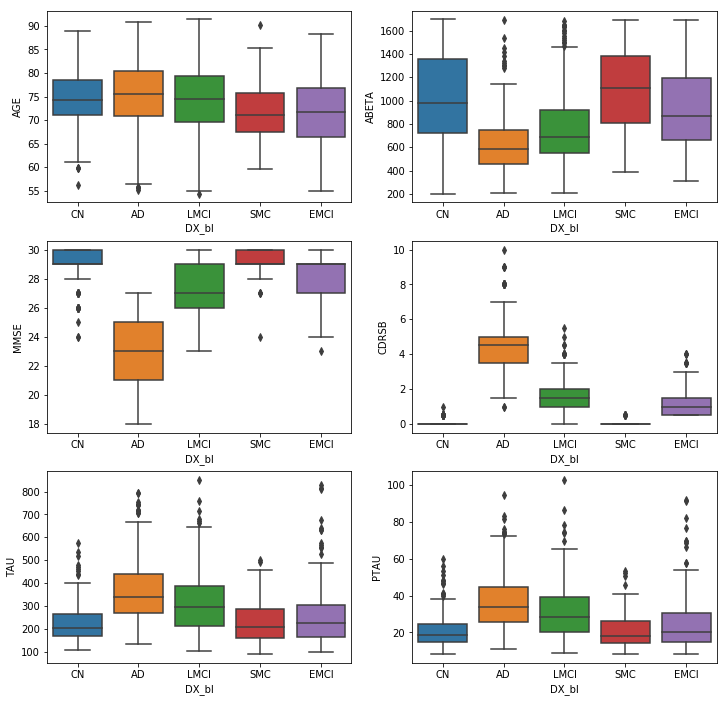

In [18]:
fig, axs = plt.subplots(3, 2, figsize=(12, 12))

sns.boxplot(x="DX_bl", y="ABETA", data=adnimerge_baseline, ax=axs[0,1])
sns.boxplot(x="DX_bl", y="MMSE", data=adnimerge_baseline, ax=axs[1,0])
sns.boxplot(x="DX_bl", y="AGE", data=adnimerge_baseline, ax=axs[0,0])
sns.boxplot(x="DX_bl", y="TAU", data=adnimerge_baseline, ax=axs[2,0])
sns.boxplot(x="DX_bl", y="PTAU", data=adnimerge_baseline, ax=axs[2,1])
sns.boxplot(x="DX_bl", y="CDRSB", data=adnimerge_baseline, ax=axs[1,1])

## Two figures, stripplot and swarmplot on VISCODE (follow-up period) and two importand AD measures related to cognitive decline
The stripplot shows an interesting pattern for decline in MMSE over time, which is more strongly present in the AD group compared to the CN group (as expected). Although we can not conclude from this graph how participants flow from one disease group to the other, it indicates that cognitive decline over time in the AD group is much greater compared to the MCI group.

The swarmplot confirms this image, as it seems that AD patients have much lower Abeta protein levels as compared to MCI and healthy controls.
This is what we in general expect from AD patients; as the Abeta protein is accumulating in the brain and forming protein clumps there, this results in an unbalance between abeta protein in the brain vs CSF (& blood) compartments, and thus AD patients show lower CSF protein levels. The Beta accumulation and following neurodegeneration in the brain is related to the cognitive decline, as shown by the reduced MMSE scores.

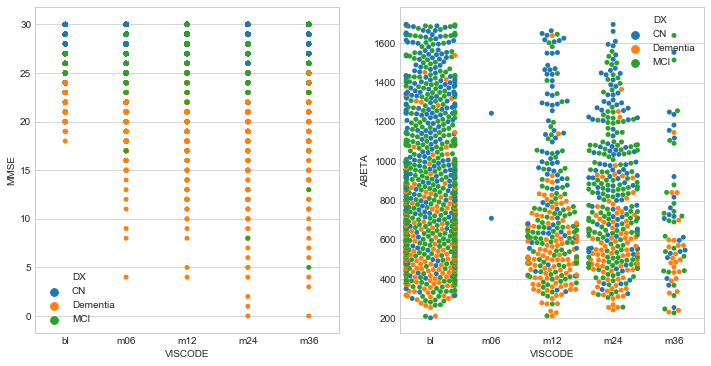

In [129]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

sns.stripplot(x="VISCODE", y="MMSE", hue="DX", data=adnimerge_baseline_3years, ax=axs[0])
sns.swarmplot(x="VISCODE", y="ABETA", hue="DX", data=adnimerge_baseline_3years, ax=axs[1])

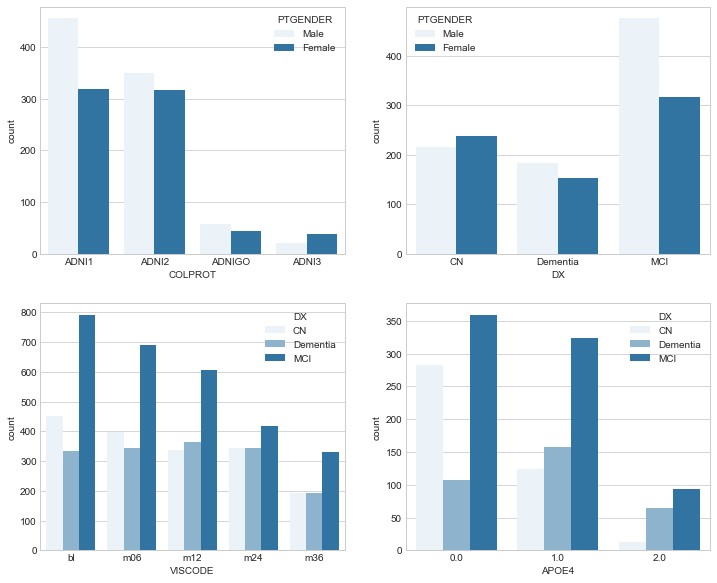

In [130]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.set_style('whitegrid')
sns.set_color_codes("muted")

sns.countplot(x='COLPROT',hue='PTGENDER',data=adnimerge3, color='#1f77b4', ax=axs[0,0])
sns.countplot(x='VISCODE', hue='DX',data=adnimerge2, color='#1f77b4', ax=axs[1,0])
sns.countplot(x='DX', hue='PTGENDER',data=adnimerge3, color='#1f77b4', ax=axs[0,1])
sns.countplot(x='APOE4', hue='DX',data=adnimerge3, color='#1f77b4', ax=axs[1,1])

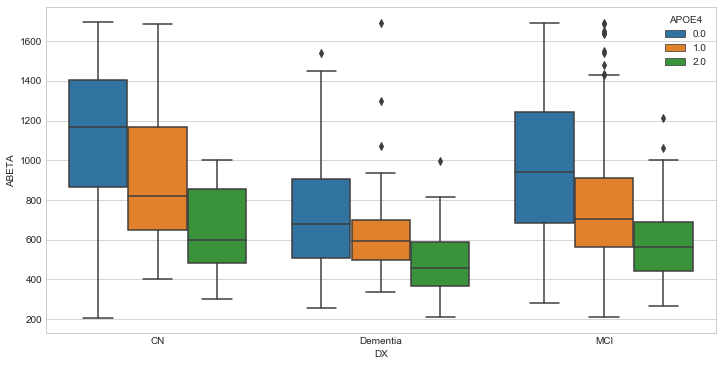

In [185]:
plt.figure(figsize=(12,6))
sns.boxplot(x="DX", y="ABETA", hue='APOE4', data=adnimerge_baseline)

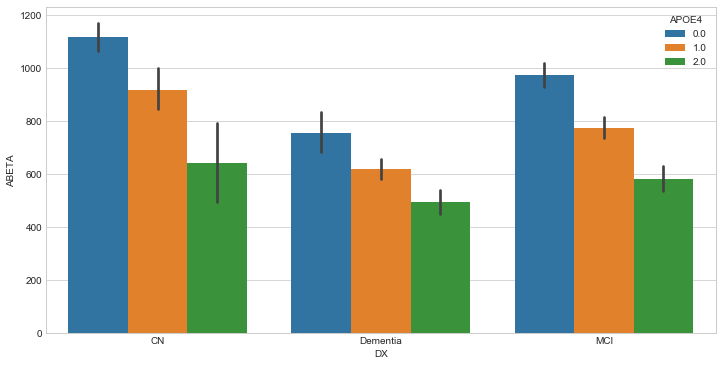

In [184]:
plt.figure(figsize=(12,6))
sns.barplot(x="DX", y="ABETA", hue='APOE4', data=adnimerge_baseline)

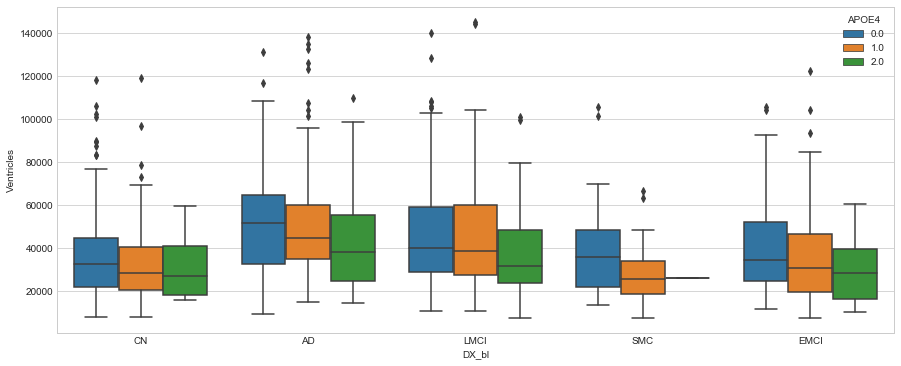

In [183]:
plt.figure(figsize=(15,6))
sns.boxplot(x="DX_bl", y="Ventricles", hue='APOE4', data=adnimerge_baseline)

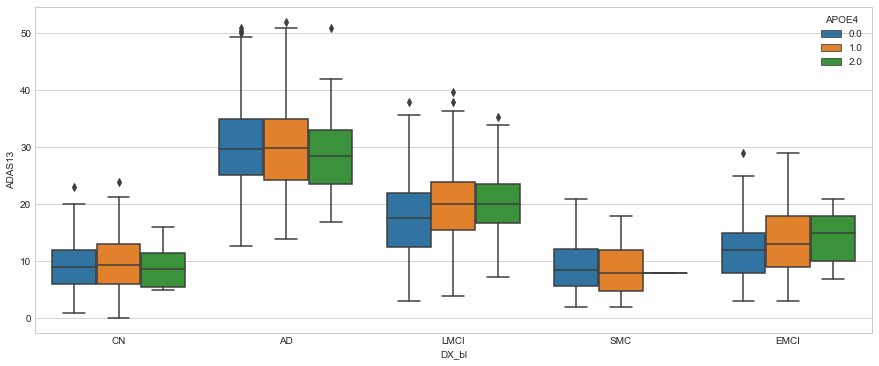

In [182]:
plt.figure(figsize=(15,6))
sns.boxplot(x="DX_bl", y="ADAS13", hue='APOE4', data=adnimerge_baseline)

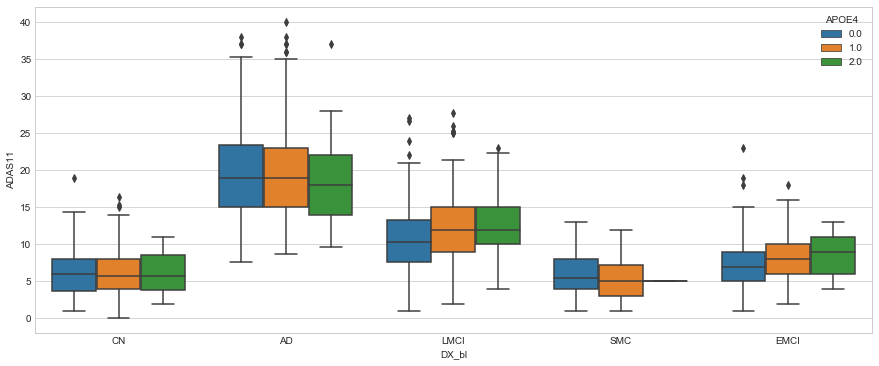

In [181]:
plt.figure(figsize=(15,6))
sns.boxplot(x="DX_bl", y="ADAS11", hue='APOE4', data=adnimerge_baseline)

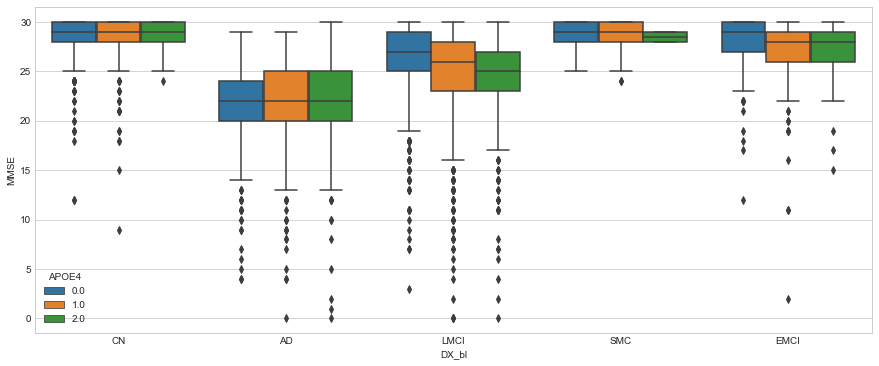

In [179]:
plt.figure(figsize=(15,6))
sns.boxplot(x="DX_bl", y="MMSE", hue='APOE4', data=adnimerge)

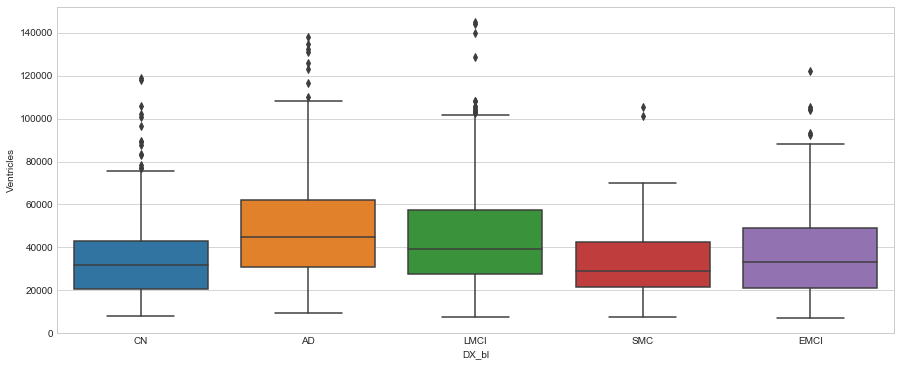

In [180]:
plt.figure(figsize=(15,6))
sns.boxplot(x="DX_bl", y="Ventricles", data=adnimerge_baseline)


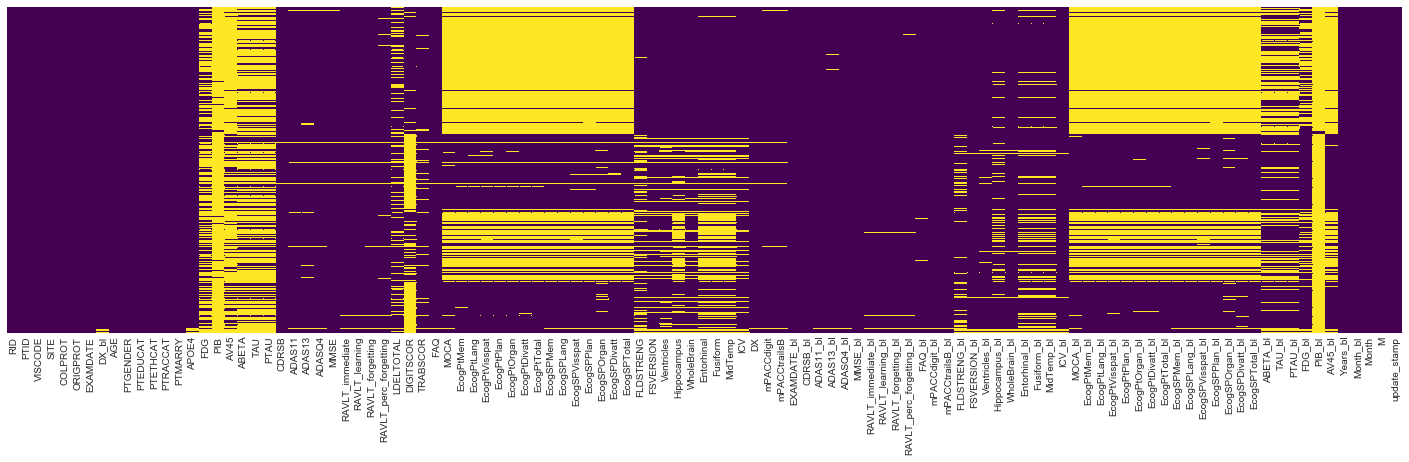

In [138]:
plt.figure(figsize=(25,6))
sns.heatmap(adnimerge_baseline_3years.isnull(),yticklabels=False,cbar=False, cmap='viridis')

Miscellanious




#plt.figure(figsize=(12,6))
#sns.stripplot(x="VISCODE", y="MMSE", hue="DX", data=adnimerge_baseline_3years)

#sns.swarmplot(x="VISCODE", y="MMSE", hue="DX", data=adnimerge2)

#plt.figure()
#plt.scatter(adnimerge2['VISCODE'].astype(str), adnimerge2['MMSE'])
#plt.xticks(range(36),['bl','','',''])
#plt.xlim(0,10)

In [149]:
from collections import Counter 
Counter(adnimerge_baseline['DX'])

Counter({'CN': 453, 'Dementia': 335, 'MCI': 791, nan: 20})

In [166]:
variable = 'MMSE'

In [168]:
feature_list = ['MMSE','MMSE']

In [169]:
for i in li:
    variable = str(i)
    print (variable)

MMSE
MMSE2


In [57]:
a = np.array(adnimerge_baseline[adnimerge_baseline['DX']=='Dementia']['MMSE'])

a_mean = a.mean()
a_mean

23.208955223880597

In [ ]:
b = np.array(adnimerge_baseline[adnimerge_baseline['DX']=='MCI']['MMSE'])

b_mean = b.mean()
b_mean

In [63]:
sp.stats.ttest_ind(a, b, equal_var=True, nan_policy='omit')

Ttest_indResult(statistic=-34.84240268602877, pvalue=5.743804880098653e-181)

In [ ]:
feature_list = ['MMSE', 'ABETA', 'AGE', 'APOE4', 'ADAS13']

for i in feature_list:
    variable = str(i)
    plt.figure(figsize=(15,6))

    sns.distplot(adnimerge_baseline[adnimerge_baseline['DX']=='CN'][variable].dropna(), hist = False)#(adnimerge_baseline['MMSE'])
    sns.distplot(adnimerge_baseline[adnimerge_baseline['DX']=='Dementia'][variable].dropna(), hist = False)
    sns.distplot(adnimerge_baseline[adnimerge_baseline['DX']=='MCI'][variable].dropna(), hist = False)
    
    
    dementia = np.array(adnimerge_baseline[adnimerge_baseline['DX']=='Dementia'][variable].dropna())
    mean_dementia = dementia.mean()
    
    MCI = np.array(adnimerge_baseline[adnimerge_baseline['DX']=='MCI'][variable].dropna())
    mean_MCI = MCI.mean()
    
    Ttest = scipy.stats.ttest_ind(a=MCI, b=dementia, equal_var=True, nan_policy='omit')
    
    print('mean_dementia ' + str(variable) + ': ' +str(mean_dementia))
    print('mean_MCI ' +str(variable) +': ' +str(mean_MCI))
    print(str(Ttest))
    print('_____________________________________')

In [ ]:
#plt.figure(figsize=(15,6))
#sns.distplot(adnimerge_baseline[adnimerge_baseline['DX']=='CN']['AGE'], hist = False)#(adnimerge_baseline['MMSE'])
#sns.distplot(adnimerge_baseline[adnimerge_baseline['DX']=='Dementia']['AGE'], hist = False)
#sns.distplot(adnimerge_baseline[adnimerge_baseline['DX']=='MCI']['AGE'], hist = False)